In [1]:
import os, sys
import numpy as np

from math import *
import matplotlib.pyplot as plt

plt.style.use('ggplot') 
plt.style.use('seaborn-paper') 
plt.style.use('seaborn-whitegrid') 
import scipy
%matplotlib inline
import matplotlib.ticker as ticker


import arviz as az
from scipy.stats import gaussian_kde


In [53]:
sobol_listx = np.array([0.00,2.00,9.0,14.0])
sobol_listy = np.array([14.0,12.0,5.0,0.0])
#50 sobol_listx = np.array([0.0,2.0,9.0,14.0])
#sobol_listy = np.array([14.0,12.0,5.0,0.0])
data_instantiation = np.column_stack((sobol_listx,sobol_listy))#.T[None]



In [54]:

num_reps = 10
params = 2
mcmcsteps = 2000 
di = 4
dlist = [0,1,2,3]
samples_gnn = np.zeros((mcmcsteps,params,num_reps,di))
samples_mss = np.zeros((mcmcsteps,params,num_reps,di))
samples_mrc = np.zeros((mcmcsteps,params,num_reps,di))

for data_rep in range(num_reps):
    for dd in range(di): 
        dis = dlist[dd]
        samples_gnn[:,:,data_rep,dd] = np.load('../inference_2d/results/2d_gnn/rep_' + str(data_rep) + '_DI_' + str(dis) + '.npy') 
        samples_mss[:,:,data_rep,dd] = np.load('../inference_2d/results/2d_multi_ss/SR_rep_' + str(data_rep) + '_DI_' + str(dis) + '.npy')
        samples_mrc[:,:,data_rep,dd] = np.load('../inference_2d/results/2d_multi_rc/SR_rep_' + str(data_rep) + '_DI_' + str(dis) + '.npy')



In [55]:
data = [samples_mss, samples_mrc, samples_gnn]

logprobs = []

for d in data:
    output = np.zeros((di,num_reps))
    for data_rep in range(num_reps):
        for dis in range(di): 
            kde = gaussian_kde(np.vstack([d[:,0,data_rep,dis],d[:,1,data_rep,dis]]))
            output[dis,data_rep] = kde.logpdf(data_instantiation[dis])
    logprobs.append(output)
            
#logprobs = np.array(logprobs)

In [56]:
# #samples_gnn[...,0,0,0].max()
# for data_rep in range(num_reps):
#     plt.plot(samples_gnn[...,0,data_rep,3])
#     plt.show()
# for data_rep in range(num_reps):
#     plt.plot(samples_gnn[...,1,data_rep,3])
#     plt.show()

In [57]:
# plt.hist(samples_gnn[...,0,6,0])#,bins=200)
# plt.show()
# plt.hist(samples_gnn[...,1,6,0])
# plt.show()

# plt.hist(samples_mss[...,0,0,3])
# plt.show()
# plt.hist(samples_mss[...,1,0,3])
# plt.show()

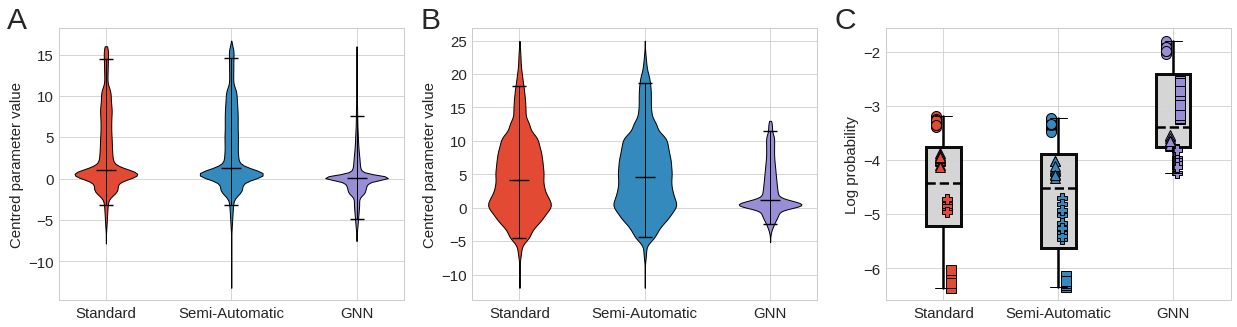

In [58]:

centred_samples_gnn = samples_gnn - data_instantiation.T[None,:,None,:]
centred_samples_mss = samples_mss - data_instantiation.T[None,:,None,:]
centred_samples_mrc = samples_mrc - data_instantiation.T[None,:,None,:]

fig, ax = plt.subplots(1, 3, figsize=(21,5))#,gridspec_kw={'width_ratios': [1,1,1.5]})

ax0 = ax[0]
ax1 = ax[1]
ax2 = ax[2]




data = [centred_samples_mss[:,0,:,:].flatten(),centred_samples_mrc[:,0,:,:].flatten(),centred_samples_gnn[:,0,:,:].flatten()]
bp = ax0.violinplot(data,showmeans=False, showmedians=False, showextrema=False)



for pc,colour in zip(bp['bodies'],['C0','C1','C2']):
    pc.set_facecolor(colour)
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    pc.set_linewidth(1)

quartile1, medians, quartile3 = np.percentile(data, [2.5, 50, 97.5], axis=1)

inds = np.arange(1, len(medians) + 1)
ax0.scatter(inds, medians, marker='_', color='black', s=400, zorder=3)
ax0.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1)
ax0.scatter(inds, quartile1, marker='_', color='black', s=200, zorder=3)
ax0.scatter(inds, quartile3, marker='_', color='black', s=200, zorder=3)

positions = (1, 2, 3)
labels = ( "Standard", "Semi-Automatic","GNN")
ax0.set_xticks(positions)
ax0.set_xticklabels(labels)
ax0.text(-0.15,1,'A', size=30, transform=ax0.transAxes)

ax0.set_ylabel('Centred parameter value',size=15)
ax0.tick_params(axis='both', which='major', labelsize=15)

data = [centred_samples_mss[:,1,:,:].flatten(),centred_samples_mrc[:,1,:,:].flatten(),centred_samples_gnn[:,1,:,:].flatten()]
bp = ax1.violinplot(data,showmeans=False, showmedians=False, showextrema=False)

for pc,colour in zip(bp['bodies'],['C0','C1','C2']):
    pc.set_facecolor(colour)
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    pc.set_linewidth(1)

quartile1, medians, quartile3 = np.percentile(data, [2.5, 50, 97.5], axis=1)

inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='_', color='black', s=400, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1)
ax1.scatter(inds, quartile1, marker='_', color='black', s=200, zorder=3)
ax1.scatter(inds, quartile3, marker='_', color='black', s=200, zorder=3)



positions = (1, 2, 3)
labels = ( "Standard", "Semi-Automatic","GNN")
ax1.set_xticks(positions)
ax1.set_xticklabels(labels)

ax1.text(-0.15,1,'B', size=30, transform=ax1.transAxes)

ax1.set_ylabel('Centred parameter value',size=15)

ax1.tick_params(axis='both', which='major', labelsize=15)


positions = (1, 2, 3)
colours = ['C0','C1','C2']
shapes = ['o','^','P','s']
offsets = np.array([-1,-0.5,0.5,1.0])/16.
for i in range(3):
    for dis in range(di):
        ax2.plot(num_reps*[i+1+offsets[dis]],logprobs[i][dis,:],shapes[dis],color='darkgrey',markersize=10,
                           markerfacecolor=colours[i],
                           markeredgecolor='black',markeredgewidth=1.0)

boxprops = dict(linestyle='-', linewidth=3, color='k',alpha=0.9)
medianprops = dict(linestyle='--', linewidth=2.5, color='k')        
whiskerprops = dict(linestyle='-', linewidth=2.5, color='k')        

bplot = ax2.boxplot([l.flatten() for l in logprobs],showfliers=False,boxprops=boxprops,medianprops=medianprops,whiskerprops=whiskerprops,patch_artist=True)
for patch in bplot['boxes']:
    patch.set_facecolor('lightgrey')
    patch.set_alpha(0.95)
    patch.set_zorder(1)


positions = (1, 2, 3)
labels = ( "Standard", "Semi-Automatic","GNN")
ax2.set_xticks(positions)
ax2.set_xticklabels(labels)
ax2.set_xlim(0.5,3.5)
#ax2.set_ylim(-10,0.0)

ax2.text(-0.15,1,'C', size=30, transform=ax2.transAxes)

ax2.set_ylabel('Log probability',size=15)

ax2.tick_params(axis='both', which='major', labelsize=15)

plt.savefig('../publication_images/2d_posterior_plots.png',dpi=300,bbox_inches='tight')
plt.show()

## 4-D plots

In [59]:

# parameters to scan
sobol_listx = np.array([1.0,3.0,10.0,10.0])
sobol_listy = np.array([9.0,12.0,10.0,5.0]) 
sobol_listva = np.array([1.5*pi, pi, 0.5*pi, 1.75*pi]) 
sobol_listlrep = np.array([0.5,2.0,3.0,1.0])    
data_instantiation = np.column_stack((sobol_listlrep,sobol_listx,sobol_listy,sobol_listva))#.T[None]


In [60]:

num_reps = 10
params = 4
mcmcsteps = 2000 
di = 4
dlist = [0,1,2,3]
samples_gnn = np.zeros((mcmcsteps,params,num_reps,di))
samples_mss = np.zeros((mcmcsteps,params,num_reps,di))
samples_mrc = np.zeros((mcmcsteps,params,num_reps,di))

for data_rep in range(num_reps):
    for dd in range(di): 
        dis = dlist[dd]
        samples_gnn[:,:,data_rep,dd] = np.load('../inference_4d/results/4d_gnn/rep_' + str(data_rep) + '_DI_' + str(dis) + '.npy') 
        samples_mss[:,:,data_rep,dd] = np.load('../inference_4d/results/4d_multi_ss/rep_' + str(data_rep) + '_DI_' + str(dis) + '.npy')
        samples_mrc[:,:,data_rep,dd] = np.load('../inference_4d/results/4d_multi_rc/rep_' + str(data_rep) + '_DI_' + str(dis) + '.npy')



In [62]:
data = [samples_mss, samples_mrc, samples_gnn]

logprobs = []

for d in data:
    output = np.zeros((di,num_reps))
    for data_rep in range(num_reps):
        for dis in range(di): 
            kde = gaussian_kde(np.vstack([d[:,0,data_rep,dis],d[:,1,data_rep,dis],d[:,2,data_rep,dis],d[:,3,data_rep,dis]]))
            output[dis,data_rep] = kde.logpdf(data_instantiation[dis])
            #if output[dis,data_rep] < -100:
            #    output[dis,data_rep]  =output[dis-1,data_rep] 
            #print(dis,data_rep,output[dis,data_rep])
    logprobs.append(output)
            
#logprobs = np.array(logprobs)

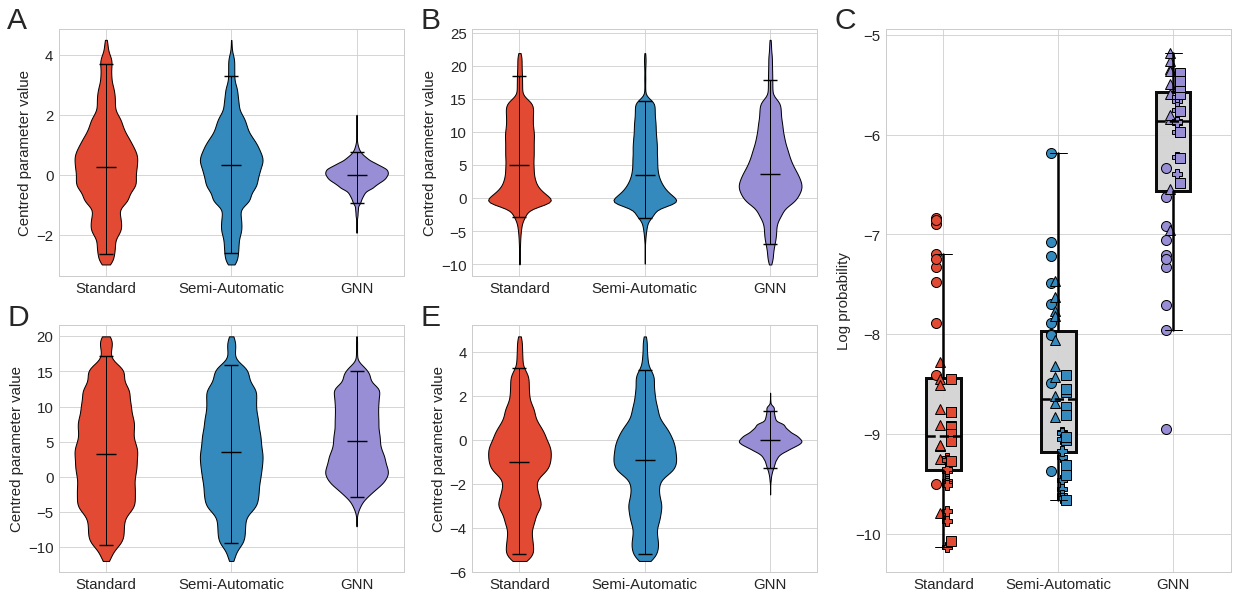

In [63]:

centred_samples_gnn = samples_gnn - data_instantiation.T[None,:,None,:]
centred_samples_mss = samples_mss - data_instantiation.T[None,:,None,:]
centred_samples_mrc = samples_mrc - data_instantiation.T[None,:,None,:]

#fig, ax = plt.subplots(2, 3, figsize=(21,5))#,gridspec_kw={'width_ratios': [1,1,1.5]})

plt.figure(figsize=(21, 10))
ax0 = plt.subplot(2,3,1)
ax1 = plt.subplot(2,3,2)
ax2 = plt.subplot(1,3,3)
ax3 = plt.subplot(2,3,4)
ax4 = plt.subplot(2,3,5)

# axes = [ax1, ax2, ax3, ax4]


# ax0 = ax[0]
# ax1 = ax[1]
# ax2 = ax[2]




data = [centred_samples_mss[:,0,:,:].flatten(),centred_samples_mrc[:,0,:,:].flatten(),centred_samples_gnn[:,0,:,:].flatten()]
bp = ax0.violinplot(data,showmeans=False, showmedians=False, showextrema=False)



for pc,colour in zip(bp['bodies'],['C0','C1','C2']):
    pc.set_facecolor(colour)
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    pc.set_linewidth(1)

quartile1, medians, quartile3 = np.percentile(data, [2.5, 50, 97.5], axis=1)

inds = np.arange(1, len(medians) + 1)
ax0.scatter(inds, medians, marker='_', color='black', s=400, zorder=3)
ax0.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1)
ax0.scatter(inds, quartile1, marker='_', color='black', s=200, zorder=3)
ax0.scatter(inds, quartile3, marker='_', color='black', s=200, zorder=3)

positions = (1, 2, 3)
labels = ( "Standard", "Semi-Automatic","GNN")
ax0.set_xticks(positions)
ax0.set_xticklabels(labels)
ax0.text(-0.15,1,'A', size=30, transform=ax0.transAxes)

ax0.set_ylabel('Centred parameter value',size=15)
ax0.tick_params(axis='both', which='major', labelsize=15)

data = [centred_samples_mss[:,1,:,:].flatten(),centred_samples_mrc[:,1,:,:].flatten(),centred_samples_gnn[:,1,:,:].flatten()]
bp = ax1.violinplot(data,showmeans=False, showmedians=False, showextrema=False)

for pc,colour in zip(bp['bodies'],['C0','C1','C2']):
    pc.set_facecolor(colour)
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    pc.set_linewidth(1)

quartile1, medians, quartile3 = np.percentile(data, [2.5, 50, 97.5], axis=1)

inds = np.arange(1, len(medians) + 1)
ax1.scatter(inds, medians, marker='_', color='black', s=400, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1)
ax1.scatter(inds, quartile1, marker='_', color='black', s=200, zorder=3)
ax1.scatter(inds, quartile3, marker='_', color='black', s=200, zorder=3)



positions = (1, 2, 3)
labels = ( "Standard", "Semi-Automatic","GNN")
ax1.set_xticks(positions)
ax1.set_xticklabels(labels)

ax1.text(-0.15,1,'B', size=30, transform=ax1.transAxes)

ax1.set_ylabel('Centred parameter value',size=15)

ax1.tick_params(axis='both', which='major', labelsize=15)


positions = (1, 2, 3)
colours = ['C0','C1','C2']
shapes = ['o','^','P','s']
offsets = np.array([-1,-0.5,0.5,1.0])/16.
for i in range(3):
    for dis in range(di):
        ax2.plot(num_reps*[i+1+offsets[dis]],logprobs[i][dis,:],shapes[dis],color='darkgrey',markersize=10,
                           markerfacecolor=colours[i],
                           markeredgecolor='black',markeredgewidth=1.0)

boxprops = dict(linestyle='-', linewidth=3, color='k',alpha=0.9)
medianprops = dict(linestyle='--', linewidth=2.5, color='k')        
whiskerprops = dict(linestyle='-', linewidth=2.5, color='k')        

bplot = ax2.boxplot([l.flatten() for l in logprobs],showfliers=False,boxprops=boxprops,medianprops=medianprops,whiskerprops=whiskerprops,patch_artist=True)
for patch in bplot['boxes']:
    patch.set_facecolor('lightgrey')
    patch.set_alpha(0.95)
    patch.set_zorder(1)


positions = (1, 2, 3)
labels = ( "Standard", "Semi-Automatic","GNN")
ax2.set_xticks(positions)
ax2.set_xticklabels(labels)
ax2.set_xlim(0.5,3.5)
#ax2.set_ylim(-10,0.0)

ax2.text(-0.15,1,'C', size=30, transform=ax2.transAxes)

ax2.set_ylabel('Log probability',size=15)

ax2.tick_params(axis='both', which='major', labelsize=15)

data = [centred_samples_mss[:,2,:,:].flatten(),centred_samples_mrc[:,2,:,:].flatten(),centred_samples_gnn[:,2,:,:].flatten()]
bp = ax3.violinplot(data,showmeans=False, showmedians=False, showextrema=False)



for pc,colour in zip(bp['bodies'],['C0','C1','C2']):
    pc.set_facecolor(colour)
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    pc.set_linewidth(1)

quartile1, medians, quartile3 = np.percentile(data, [2.5, 50, 97.5], axis=1)

inds = np.arange(1, len(medians) + 1)
ax3.scatter(inds, medians, marker='_', color='black', s=400, zorder=3)
ax3.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1)
ax3.scatter(inds, quartile1, marker='_', color='black', s=200, zorder=3)
ax3.scatter(inds, quartile3, marker='_', color='black', s=200, zorder=3)

positions = (1, 2, 3)
labels = ( "Standard", "Semi-Automatic","GNN")
ax3.set_xticks(positions)
ax3.set_xticklabels(labels)
ax3.text(-0.15,1,'D', size=30, transform=ax3.transAxes)

ax3.set_ylabel('Centred parameter value',size=15)
ax3.tick_params(axis='both', which='major', labelsize=15)



data = [centred_samples_mss[:,3,:,:].flatten(),centred_samples_mrc[:,3,:,:].flatten(),centred_samples_gnn[:,3,:,:].flatten()]
bp = ax4.violinplot(data,showmeans=False, showmedians=False, showextrema=False)



for pc,colour in zip(bp['bodies'],['C0','C1','C2']):
    pc.set_facecolor(colour)
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    pc.set_linewidth(1)

quartile1, medians, quartile3 = np.percentile(data, [2.5, 50, 97.5], axis=1)

inds = np.arange(1, len(medians) + 1)
ax4.scatter(inds, medians, marker='_', color='black', s=400, zorder=3)
ax4.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1)
ax4.scatter(inds, quartile1, marker='_', color='black', s=200, zorder=3)
ax4.scatter(inds, quartile3, marker='_', color='black', s=200, zorder=3)

positions = (1, 2, 3)
labels = ( "Standard", "Semi-Automatic","GNN")
ax4.set_xticks(positions)
ax4.set_xticklabels(labels)
ax4.text(-0.15,1,'E', size=30, transform=ax4.transAxes)

ax4.set_ylabel('Centred parameter value',size=15)
ax4.tick_params(axis='both', which='major', labelsize=15)





plt.savefig('../publication_images/4d_posterior_plots.png',dpi=300,bbox_inches='tight')
plt.show()

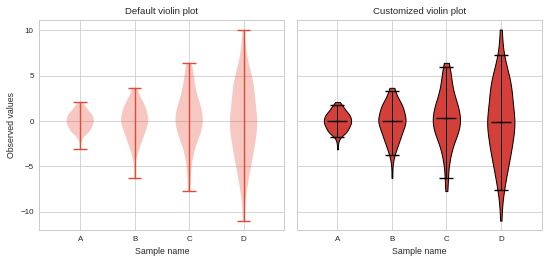

In [19]:
import matplotlib.pyplot as plt
import numpy as np


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    pc.set_linewidth(1)

quartile1, medians, quartile3 = np.percentile(data, [2.5, 50, 97.5], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='_', color='black', s=400, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1)
ax2.scatter(inds, quartile1, marker='_', color='black', s=200, zorder=3)
ax2.scatter(inds, quartile3, marker='_', color='black', s=200, zorder=3)


#ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()


In [54]:
pc.set_linewidth(10)

array([-0.6626138 , -1.32421006, -1.33282218, -3.03203139])

In [29]:
samples_gnn.shape

(2000, 2, 5, 4)

In [30]:
data_instantiation.T[None,:,None,:].shape

(1, 2, 1, 4)

(array([ 9205., 10856.,  9095., 11834., 15901.,  8926.,  5435.,  3097.,
         2989.,  2662.]),
 array([-14.99995447, -11.30002513,  -7.60009578,  -3.90016644,
         -0.20023709,   3.49969225,   7.1996216 ,  10.89955094,
         14.59948029,  18.29940963,  21.99933898]),
 <BarContainer object of 10 artists>)

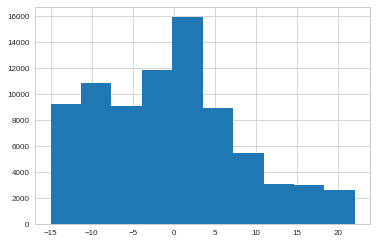

In [22]:
####
#Euclidean distance
#new z-score without the mean:
ax = plt.violinplot([zscores_mss_new[:,0,:,:].flatten(),zscores_mrc_new[:,0,:,:].flatten(),zscores_gnn_new[:,0,:,:].flatten()],showmeans=True,showmedians=False)
positions = (1, 2, 3)
labels = ( "GPABC", "SA-GPABC","GNN")
plt.xticks(positions, labels)
plt.ylabel('Euclidean distance')
plt.title('$l_{ali}$')
plt.savefig('4dviolins_param0.png',dpi=600)
plt.show()

ax = plt.violinplot([zscores_mss_new[:,1,:,:].flatten(),zscores_mrc_new[:,1,:,:].flatten(),zscores_gnn_new[:,1,:,:].flatten()],showmeans=True,showmedians=False)
positions = (1, 2, 3)
labels = ( "GPABC", "SA-GPABC","GNN")
plt.xticks(positions, labels)
plt.title('$l_{att}$')
plt.ylabel('Euclidean distance')
plt.savefig('4dviolins_param1.png',dpi=600)
plt.show()

ax = plt.violinplot([zscores_mss_new[:,2,:,:].flatten(),zscores_mrc_new[:,2,:,:].flatten(),zscores_gnn_new[:,2,:,:].flatten()],showmeans=True,showmedians=False)
positions = (1, 2, 3)
labels = ( "GPABC", "SA-GPABC","GNN")
plt.xticks(positions, labels)
plt.ylabel('Euclidean distance')
plt.title('$l_{ali}$')
plt.savefig('4dviolins_param2.png',dpi=600)
plt.show()

ax = plt.violinplot([zscores_mss_new[:,3,:,:].flatten(),zscores_mrc_new[:,3,:,:].flatten(),zscores_gnn_new[:,3,:,:].flatten()],showmeans=True,showmedians=False)
positions = (1, 2, 3)
labels = ( "GPABC", "SA-GPABC","GNN")
plt.xticks(positions, labels)
plt.title('$l_{att}$')
plt.ylabel('Euclidean distance')
plt.savefig('4dviolins_param3.png',dpi=600)
plt.show()

In [18]:

data_instantiation[:,0].shape

(1, 2)

In [9]:
samples_gnn.shape

(2000, 2, 5, 4)

In [15]:
np.load('2d_gnn/rep_' + str(data_rep) + '_DI_' + str(dis) + '.npy').shape

(2000, 2)

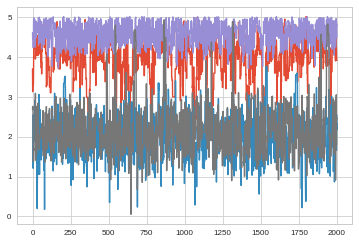

In [30]:
plt.plot(samples_gnn[:,0,8,1])
plt.plot(samples_gnn[:,0,7,1])
plt.plot(samples_gnn[:,0,5,1])
plt.plot(samples_gnn[:,0,6,1])


plt.show()

In [18]:
data_instantiation[1]

array([ 2.        ,  3.        , 12.        ,  3.14159265])